In [1]:
import os
import cv2
import math
import torch
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

/home/jianming/conda/envs/pica37/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
image_path = "/home/jianming/work/multiface/dataset/m--20180227--0000--6795937--GHS/unwrapped_uv_1024/E001_Neutral_Eyes_Open/average/000102.png"
img = cv2.imread(image_path)
input_photo = np.asarray(img)
U, s, V = np.linalg.svd(input_photo)

2385.0193317180365 2384.83617509047 2372.9289355536957 2373.491267641814 2352.844835268642 2354.491000787146 2339.5437224997368 2333.4384513905247 2321.0170978450587 2312.7724494760573 2339.615101821658 2341.7035948799776 2342.4483883259704 2358.754590367002 2387.345511336753 2396.8714421629966 2415.9566421002423 2425.048206979055 2435.4542673967276 2443.4616156807033 2442.2803447399474 2429.4343357715534 2423.2178222033003 2437.1281702669144 2443.3140988665923 2443.3021077648814 2464.093225840068 2459.9381326487724 2453.904315432423 2433.9174186882 2418.0303898872876 2390.9581915374747 2392.733362896474 2385.762831235433 2397.0689972743603 2402.913114390872 2415.342137649524 2422.7474637369737 2418.821954764708 2433.596990296802 2424.6713133964877 2415.61696240199 2412.50910412729 2395.1174853231787 2389.607207922117 2383.6060663141134 2383.214480604114 2380.6736677854947 2388.8468369320676 2383.4991006265254 2385.3701241618705 2374.598405229249 2373.187992766513 2379.006953885237 237

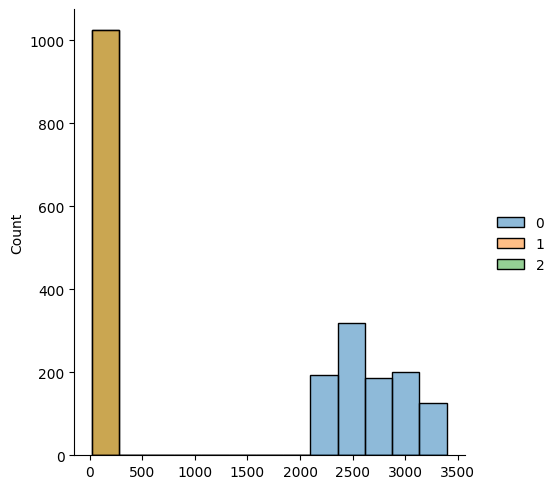

In [8]:
for j in range(3):
    for i in range(1024):
        print(s[i,j], end=" ")
    print()

sns.displot(s)

# Original VAE model

In [2]:
threshold_list = [0]#4, 5]
# threshold_list = [0.4, 0.8, 1, 1.6, 2.4, 3, 4, 5]

number_files = 5566
batch_size = 8

captured_data_list = f"/home/jianming/work/Privatar_prj/profiled_latent_code/original_model"

captured_z_outsource_data = np.zeros(((number_files-1)*batch_size, 256))

for i in range(number_files-1):
    z_outsource_file_list = f"{captured_data_list}/z_{i+1}.pth"
    captured_z_outsource = torch.load(z_outsource_file_list).to("cpu")
    captured_z_outsource_data[i*batch_size:(i+1)*batch_size] = captured_z_outsource.detach().numpy()
covariance_matrix_z_outsource = np.cov(captured_z_outsource_data, rowvar=False)

In [3]:
# plt.hist(captured_z_outsource_data, 256)

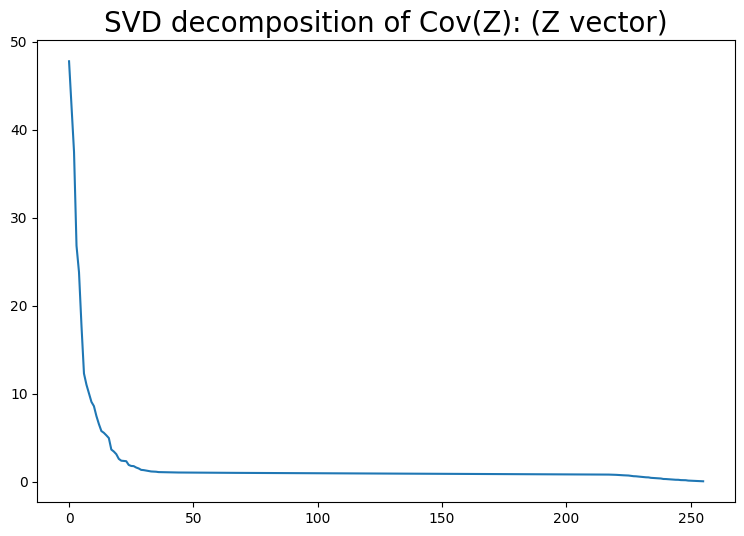

In [4]:
U, s, V = np.linalg.svd(covariance_matrix_z_outsource)

X = [i for i in range(covariance_matrix_z_outsource.shape[0])]

# Data for plotting
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.figure(figsize=(9, 6))
plt.plot(X, s)
# cbar = plt.colorbar(label="std value SVD vector", orientation="horizontal") 
# cbar.solids.set_edgecolor("face")
# for t in cbar.ax.get_yticklabels():
#      t.set_fontsize(20)

# plt.xlabel('Year')
# plt.ylabel('Parameters (in billions, log scale)', fontsize=SMALL_SIZE)
plt.title('SVD decomposition of Cov(Z): (Z vector)', fontsize=SMALL_SIZE)

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

In [5]:
"""
    Appling noise directly to the entire outsourced model to give a certained mutual information bound
    The prior successful rate is 1/67
    This script aims at calculating the posterior successful rate
"""

# l2_norm = np.linalg.norm(captured_z_outsource_data)
# U, s_original, V = np.linalg.svd(captured_z_outsource_data)

In [6]:
# print(s_original)

In [ ]:
"""
    perform noise calculation on the original data
"""
# overall_result = 0
# for ele in s_original:
#     overall_result = overall_result + np.sqrt(ele)
# overall_result = overall_result / 256
# print(overall_result)
# l2_norm_svd_decomposition_original = np.linalg.norm(s_original)
# l2_norm = np.linalg.norm(captured_z_outsource_data)
# print(f"l2_norm = {l2_norm}")
# print("print detailed value of individual elements:")
# for ele in s_original:
#     print(ele, end=" ")

15.06342430977763
l2_norm = 5142.855696140467
print detailed value of individual elements:
2110.924409878811 1449.518663747812 1367.8982907381169 1180.490513370135 1040.8592763464505 976.6886501949259 887.8913679938497 738.2732581022556 700.5683168740218 662.2684398785567 635.6085773349245 614.5557703420283 568.9488446181982 540.2516939890655 506.3144465827512 490.5237055967707 482.744801158565 470.32274229647896 403.5342780761277 384.58142447863867 354.6890491447956 340.15109997268166 326.3054848107616 324.18665790637556 319.3248908793868 290.237938822324 282.62318985982 281.55900304975 262.4900759412642 259.412268278609 244.91517412632697 243.16363818481213 238.281790132042 231.91962194248435 228.75221774019582 227.75184816949024 223.9260500949202 221.37587485004383 220.38597228085067 219.64198361803852 218.8598944267223 218.2165856873185 217.3879214770476 217.33047044819807 216.94289323926358 216.91182124400095 216.6736178561572 216.29459307023947 216.12026437354442 216.010749774151

In [7]:
# perform noise calculation on the convariance matrix
def generation_l2norm_l2cov(z_data):
    covariance_matrix_z_outsource = np.cov(z_data, rowvar=False)
    l2_norm_cov = np.linalg.norm(covariance_matrix_z_outsource)
    U_cov, s_cov, V_cov = np.linalg.svd(covariance_matrix_z_outsource)

    overall_result_cov = 0
    for ele in s_cov:
        overall_result_cov = overall_result_cov + np.sqrt(ele)
    overall_result_cov = overall_result_cov / 256
    print(f"overall_result_cov={overall_result_cov}; s_cov={s_cov}")


    print("print detailed value of individual elements in convariance:")
    for ele in s_cov:
        print(ele, end=" ")
    return l2_norm_cov, U_cov, s_cov, V_cov

# calculate noise of each dimensions
def generate_noise_covariance(mutual_info_bound, s_cov):
    l2_norm_svd_decomposition_original = np.linalg.norm(s_cov)
    print(f"l2_norm_svd_decomposition_original = {l2_norm_svd_decomposition_original}")
    noise_variance = np.zeros(256)
    for i in range(256):
        noise_variance[i] =  2 * mutual_info_bound / (s_cov[i] * l2_norm_svd_decomposition_original)
    return noise_variance
    

# Function to sample from a 2D Gaussian distribution
def sample_2d_gaussian(mean, U_cov, noise_variance, V_cov, num_samples=1000):
    """
    Samples points from a 2D Gaussian distribution.

    Parameters:
    mean (array-like): Mean of the Gaussian distribution (shape: [256]).
    cov (array-like): Covariance matrix of the Gaussian distribution (shape: [256, 256]).
    num_samples (int): Number of samples to generate.

    Returns:
    np.ndarray: Samples from the Gaussian distribution (shape: [num_samples, 256]).
    """
    variance_matrix = (U_cov*noise_variance*V_cov)
    variance_matrix_tensor = torch.tensor(variance_matrix)
    torch.save(variance_matrix_tensor, "/home/jianming/work/Privatar_prj/profiled_latent_code/noise_variance_matrix_0.pth")
    samples = np.random.multivariate_normal(mean, variance_matrix, num_samples)
    return samples

In [12]:
num_element_mean = 256
mutual_info_bound = 0.1
num_samples = 1

l2_norm_cov, U_cov, s_cov, V_cov = generation_l2norm_l2cov(captured_z_outsource_data)

noise_variance = generate_noise_covariance(mutual_info_bound, s_cov)

mean = np.zeros(num_element_mean)
noise_samples = sample_2d_gaussian(mean, U_cov, noise_variance, V_cov, num_samples)
print(noise_samples)

overall_result_cov=1.1360150414233112; s_cov=[47.78184263 42.54976843 37.48630687 26.8193697  23.81613094 17.72968627
 12.30372723 11.02972508 10.03795955  9.08394506  8.59753805  7.47576873
  6.56043299  5.77061518  5.56564377  5.28154083  4.97029665  3.66663422
  3.44080622  3.14057004  2.60784514  2.39935534  2.37358645  2.34207879
  1.9150992   1.80169942  1.78202181  1.62230115  1.51861491  1.35631692
  1.32861485  1.27587479  1.22107286  1.17627059  1.16530176  1.14461367
  1.10415653  1.09710348  1.0850522   1.07701452  1.07294627  1.06151339
  1.06095242  1.06055531  1.05696536  1.05468044  1.05089608  1.04918619
  1.04823437  1.04631511  1.04257938  1.04182147  1.03950706  1.03802338
  1.03501998  1.03485451  1.03345771  1.0331357   1.03047742  1.02917997
  1.02809198  1.0251499   1.02306126  1.02206818  1.01967361  1.01874608
  1.01768963  1.01612905  1.01489985  1.01371471  1.01139376  1.00999984
  1.00948662  1.00787911  1.00689992  1.00439724  1.00399946  1.00273161
  1.00

/home/jianming/conda/envs/pica37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: covariance is not positive-semidefinite.


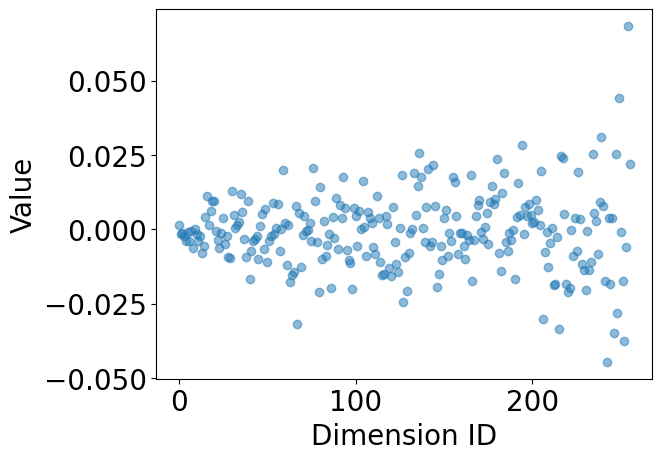

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = [i for i  in range(num_element_mean)]
plt.scatter(x, noise_samples, alpha=0.5)
plt.xlabel('Dimension ID')
plt.ylabel('Value')
plt.show()

# outsourced data path

# Compare noise pre and post-partitioning

In [16]:
noise_variance_hp_4_mi_0_1_outsource_path = torch.load("/home/jianming/work/Privatar_prj/profiled_latent_code/noise_variance_matrix_horizontal_partition_4_mutual_bound_0.1_outsource_path_latent.pth")
noise_variance_hp_4_mi_0_1_private_path = torch.load("/home/jianming/work/Privatar_prj/profiled_latent_code/noise_variance_matrix_horizontal_partition_4_mutual_bound_0.1_private_path_latent.pth")
noise_variance_mi_0_1_original_model = torch.load("/home/jianming/work/Privatar_prj/profiled_latent_code/noise_variance_matrix_0_mutual_bound_0.1.pth")

In [17]:
noise_l2norm_hp_4_mi_0_1_outsource_path = np.linalg.norm(noise_variance_hp_4_mi_0_1_outsource_path)
noise_l2norm_hp_4_mi_0_1_private_path = np.linalg.norm(noise_variance_hp_4_mi_0_1_private_path)
noise_l2norm_mi_0_1_original_model = np.linalg.norm(noise_variance_mi_0_1_original_model)

In [18]:
print(noise_l2norm_hp_4_mi_0_1_outsource_path)
print(noise_l2norm_hp_4_mi_0_1_private_path)
print(noise_l2norm_mi_0_1_original_model)

0.012180503582776005
0.004321768166827717
0.0059033313994137655
